In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [38]:
df = pd.read_csv("./data/p3.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
y = df['Close_diff']
y.head()

Date
2006-01-31         NaN
2006-02-28    1.090947
2006-03-31   -1.237643
2006-04-30    0.016064
2006-05-31   -0.300550
Name: Close_diff, dtype: float64

In [39]:
train_size = int(len(y) * 0.8)
train = y.iloc[:train_size]
test = y.iloc[train_size:]

In [40]:
model = ARIMA(train)
result = model.fit()
n_steps = len(test)
forecast_values = result.forecast(steps=n_steps)

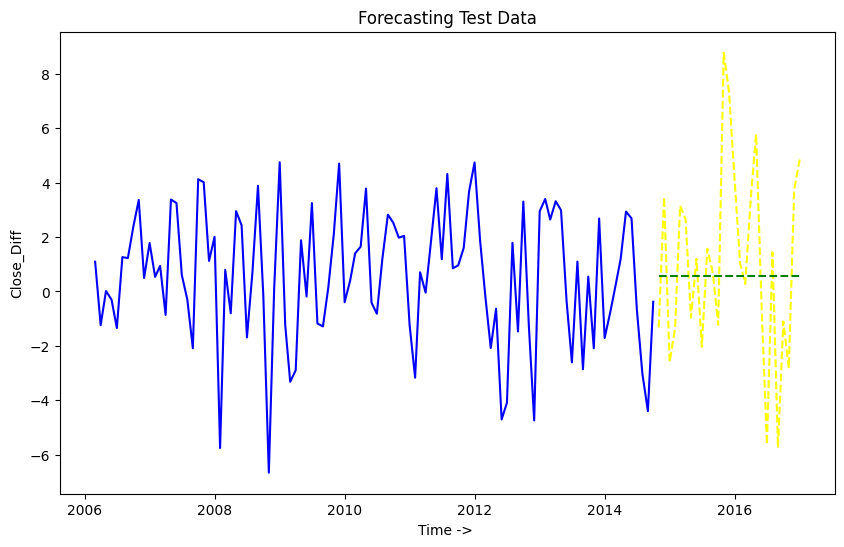

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual', color='yellow', linestyle='--')
plt.plot(forecast_values, label='Forecast', color='green', linestyle='--')
plt.title("Forecasting Test Data")
plt.xlabel("Time")
plt.ylabel("Close_Diff")
plt.show()